In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from matplotlib import colors

def loadData(filename):
    """默认csv文件第一行是列属性，以下每行是训练数据
    并且数据的最后一列必然是数据的label"""
    frame = pd.read_csv(filename)#读为DataFrame格式
    labels = frame['label']#获取标记
    attrset = list(frame.columns)
    attrset.remove('label')
    dataset = list(frame.values)
    for i in range(frame.shape[0]):#遍历所有数据
        dataset[i] = list(dataset[i])
        dataset[i].pop()
    return dataset, list(labels), attrset

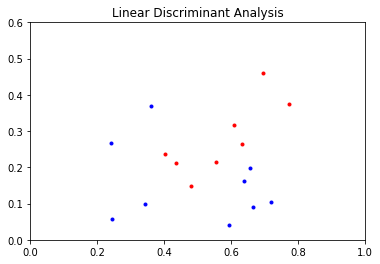

In [27]:
dataframe = pd.read_csv('data3.0alpha.csv')

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Xp, Xn = [], [] 
for i in range(dataframe.shape[0]):
    x = dataframe.loc[i]
    if x['label'] == 1:
        Xp.append(x[:2].values)
    else: Xn.append(x[:2].values)
Xp = np.array(Xp)
Xn = np.array(Xn)
clf = LinearDiscriminantAnalysis()
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
plt.title('Linear Discriminant Analysis')
plt.scatter(Xp[:, 0], Xp[:, 1], marker = '.', color='red')
plt.scatter(Xn[:, 0], Xn[:, 1], marker = '.', color='blue')
ax.set_xlim(0,1)
ax.set_xlabel('density')
ax.set_ylim(0,0.6)
plt.show()